# 東京都23区ごとの放置自転車数を解析しよう

### このノートブックでやること

* ArcGIS Online へ ArcGIS for Develoers のアカウントを使ってログインする
* Jupyter Notebook へ地図を表示させる
* フィーチャ レイヤーの作成①：CSV の中身を pandas で確認しよう！
* フィーチャ レイヤーの作成②：CSV からフィーチャサービスを公開しよう！
* フィーチャ レイヤーの作成③：公開したフィーチャサービスを Jupyter Notebook の地図に追加しよう！
* 解析：東京都 23 区ごとの放置自転車数を解析する
* グラフ表示
* Web マップの形で出力しよう


### ArcGIS for Develoersのアカウントを使ってログインする

In [1]:
# ArcGIS for Developers ログイン情報
develoersUser = ''
develoersPass = ''

<User username:wakanameeeko>
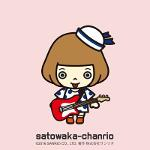

In [2]:
from arcgis.gis import GIS
gis = GIS("http://"+ develoersUser +".maps.arcgis.com/",develoersUser,develoersPass)
user = gis.users.get(develoersUser)
user

In [3]:
# ArcGIS for Developers で使えるクレジット数（おまけ）
beforeCredit = gis.admin.credits.credits
beforeCredit

36.9028

### Jupyter Notebookへ地図を表示させる

In [4]:
geodevmap = gis.map("東京都", zoomlevel = 12)
geodevmap

### フィーチャ レイヤーの作成①：CSVの中身をpandasで確認しよう！
手順
* (データ準備)
* データ読み込み
* 中身の確認

##### データ取得

使用する CSV ファイルを入手します。
githubからcloneまたはzipでノートブックをダウンロードすると次のフォルダに格納しています。

C:<任意のフォルダ>\arcgis-samples-python-api-master\arcgis-samples-python-api-master>tree /f
-  handson\meetup
         │  Meetup Hands On!.ipynb
         │
         └─data
             illegal_parking_2015.csv

ダウンロード元

[東京都内の放置自転車（2015）](https://hub.arcgis.com/datasets/ejopendataportal::%E6%9D%B1%E4%BA%AC%E9%83%BD%E5%86%85%E3%81%AE%E6%94%BE%E7%BD%AE%E8%87%AA%E8%BB%A2%E8%BB%8A%EF%BC%882015%EF%BC%89)

ページ右側の「ダウンロード」ボタンから[スプレッドシート]を選択して任意の場所に保存します。

ファイル名は次でお願いします
* illegal_parking_2015.csv


##### 中身の確認

In [5]:
# csvファイルの読み込み
illegal_parking_csv = 'C:\\Users\\ej2238.ESRIJ\\Desktop\\arcgis-samples-python-api-master\\arcgis-samples-python-api-master\\handson\\meetup\\data\\illegal_parking_2015.csv'
illegal_parking_csv

'C:\\Users\\ej2238.ESRIJ\\Desktop\\arcgis-samples-python-api-master\\arcgis-samples-python-api-master\\handson\\meetup\\data\\illegal_parking_2015.csv'

In [6]:
import pandas as pd
from IPython.display import display
dataflame = pd.read_csv(illegal_parking_csv)
display(dataflame)

,X,Y,OBJECTID,駅名,放置台数_自転車,放置台数_原付,放置台数_自二,実収容台数_自転車,実収容台数_原付,収容能力_自転車,収容能力_原付,F_TEST
0,139.839999,35.747602,1,お花茶屋駅,74,7,0,892,8,2927,58,2035
1,139.778647,35.629825,2,お台場海浜公園駅,116,0,0,217,10,217,20,0
2,139.481864,35.517121,3,すずかけ台駅,0,0,0,253,53,253,80,0
3,139.484984,35.527165,4,つくし野駅,0,0,0,39,99,275,155,236
4,139.798637,35.712376,5,つくばエクスプレス浅草駅,301,22,8,282,0,760,0,478
5,139.574951,35.657928,6,つつじヶ丘駅,27,0,0,3113,79,4370,135,1257
6,139.779411,35.617559,7,テレコムセンター駅,13,4,1,0,0,0,0,0
7,139.808884,35.710317,8,とうきょうスカイツリー駅,51,6,0,513,0,1920,0,1407
8,139.688812,35.758822,9,ときわ台駅,208,13,8,1212,13,1686,55,474
9,139.545805,35.751474,10,ひばりヶ丘駅,37,4,2,3902,106,5381,182,1479


### フィーチャ レイヤーの作成②：CSVからフィーチャサービスを公開しよう！

In [7]:
# CSV ファイルを ArcGIS Online へアップロード
illegal_parking_bicycles = gis.content.add({},illegal_parking_csv)

In [8]:
# アップロードした CSV ファイルもとにフィーチャ レイヤーを作成・公開する
illegal_parking_bicycles_layer = illegal_parking_bicycles.publish()
illegal_parking_bicycles_layer
# ArcGIS Online へログインしてアイテムを確認してみましょう。

<Item title:"illegal_parking_2015" type:Feature Layer Collection owner:wakanameeeko>

### フィーチャ レイヤーの作成③：公開したフィーチャサービスを Jupyter Notebook の地図に追加しよう！

In [9]:
geodevmap.add_layer(illegal_parking_bicycles_layer)
# このあと地図をみてみましょう！↑

### 解析：東京都 23 区ごとの放置自転車数を解析する
東京都のポリゴン（図形データ）を使って、区ごとに次のことを解析して求めます。
* ポリゴン内のポイントの数
* ポリゴン内のそれぞれのポイントが持つ属性情報で「放置自転車数」を合算する

手順
* 東京都のポリゴンデータを呼び出す
* ArcGIS Online のエリア集計の解析を実行する


##### 東京都のポリゴンデータを呼び出す

In [10]:
tokyo_polygon = {"type":"FeatureLayer",
                "url":"https://services3.arcgis.com/iH4Iz7CEdh5xTJYb/arcgis/rest/services/CITY/FeatureServer/0",
                "opacity":0.75}
# 表示している地図に重ねる
geodevmap.add_layer(tokyo_polygon)
# このあと地図をみてみましょう！↑

##### ArcGIS Online のエリア集計の解析を実行する

In [12]:
from arcgis.features import summarize_data
summarize_layer = summarize_data.summarize_within(tokyo_polygon,
                                illegal_parking_bicycles_layer,
                                sum_shape=True,
                                shape_units='SquareMiles',
                                summary_fields=["放置台数_自転車 SUM"],
                                output_name='東京都エリア集計_2015',
                                gis=gis)
summarize_layer

<Item title:"東京都エリア集計_2015" type:Feature Layer Collection owner:wakanameeeko>

In [13]:
# 解析結果を地図へ表示する
geodevmap.add_layer(summarize_layer)
# このあと地図をみてみましょう！↑

### グラフ表示
エリア集計解析結果を見てみよう

In [14]:
import requests
import io
import pandas
from IPython.display import display
import json

In [15]:
layer = summarize_layer.layers[0]
layer.query().df

,AREA,AnalysisArea,CITY,CITY_1,CSS_NAME,KEN,KEN_NAME,KIGO_I,OBJECTID,OBJECTID_1,PERIMETER,Point_Count,SUM_放置台数_自転車,X_CODE,Y_CODE,SHAPE
0,48581.443,4.372601,101,101,千代田区,13,東京都,,2230,1,1012.871,17,3819,139.75722,35.69124,"{'rings': [[[15559470.4977, 4259927.0968], [15..."
1,1869886.225,4.165976,102,102,中央区,13,東京都,,2346,2,28819.222,20,1377,139.78221,35.65092,"{'rings': [[[15560725.1312, 4258898.4309], [15..."
2,159371.869,8.234020,103,103,港区,13,東京都,,2447,3,5741.378,30,1862,139.77723,35.63622,"{'rings': [[[15554674.1131, 4257010.0754], [15..."
3,71488.615,7.051436,104,104,新宿区,13,東京都,,2567,4,1469.196,27,2169,139.71927,35.69009,"{'rings': [[[15548935.6242, 4263398.3063], [15..."
4,110982.845,4.389739,105,105,文京区,13,東京都,,2720,5,1907.716,13,789,139.73008,35.71400,"{'rings': [[[15556378.6678, 4264342.031], [155..."
5,66212.024,3.894807,106,106,台東区,13,東京都,,2788,6,1085.655,13,2359,139.78179,35.71898,"{'rings': [[[15558761.8096, 4263187.5212], [15..."
6,194629.730,5.298058,107,107,墨田区,13,東京都,,2896,7,2387.542,13,1273,139.81360,35.71077,"{'rings': [[[15567005.3849, 4261913.9172], [15..."
7,428855.447,16.976896,108,108,江東区,13,東京都,,3000,8,4158.700,27,1526,139.78780,35.61739,"{'rings': [[[15564585.8436, 4260505.7106], [15..."
8,121110.112,9.059130,109,109,品川区,13,東京都,,1987,9,1450.170,25,1153,139.71383,35.61996,"{'rings': [[[15553312.3532, 4251299.5563], [15..."
9,97978.226,5.713775,110,110,目黒区,13,東京都,,1847,10,1582.337,9,326,139.71334,35.63239,"{'rings': [[[15548565.7416, 4254486.7585], [15..."


#### 必要な要素だけで見てみよう

In [17]:
illegal_parking_bicycles_df = layer.query().df
# 3つの要素だけで表示
filtered_df = illegal_parking_bicycles_df[['CSS_NAME', 'SUM_放置台数_自転車','Point_Count']]
# 要素でソートして表示
sorted_df = filtered_df.sort_values(by='SUM_放置台数_自転車',ascending=False)
sorted_df

,CSS_NAME,SUM_放置台数_自転車,Point_Count
0,千代田区,3819,17
5,台東区,2359,13
11,世田谷区,2216,37
3,新宿区,2169,27
18,板橋区,2142,18
2,港区,1862,30
7,江東区,1526,27
16,北区,1509,13
10,大田区,1418,35
1,中央区,1377,20


D:\ProgramFiles\python\anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


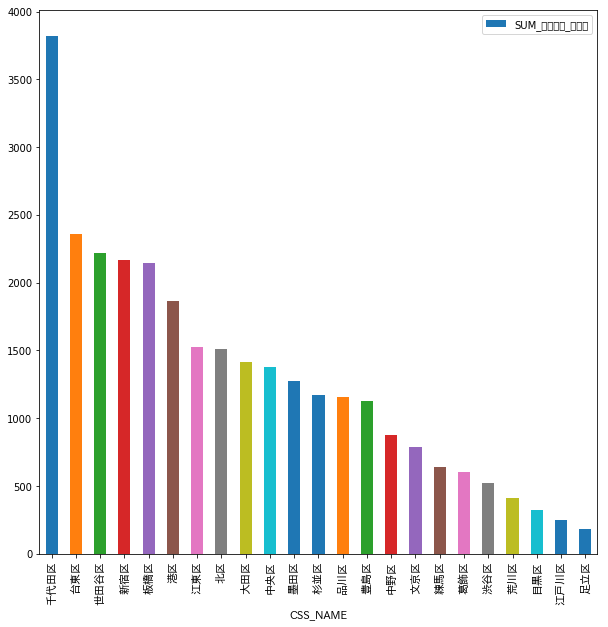

In [18]:
import matplotlib.pyplot as pd
from matplotlib.font_manager import FontProperties
# matplotlibはデフォルトで日本語フォントをもっていないそうなので、豆腐（文字化け）の場合はフォントを指定します。
fp = FontProperties(fname=r'D:\\ProgramFiles\\Fonts\\ipaexg.ttf', size=11)
# グラフの設定
graphdata = sorted_df.plot(x='CSS_NAME', y='SUM_放置台数_自転車', kind='bar', figsize=(10,10))
graphdata.set_xticklabels(sorted_df['CSS_NAME'], fontproperties=fp)
graphdata.set_xlabel('CSS_NAME', fontproperties=fp)
pd.show()
pd.close()

### Web マップ作成

In [20]:
import arcgis
from arcgis.gis import GIS
from arcgis.mapping import WebMap

web_map_properties = {'title':'MeetupHandsOn228',
                     'snippet':'GeoDev Meetup ハンズオンで作成した Web マップ',
                     'tags':'geodev_jp'}

In [21]:
web_map_item = geodevmap.save(item_properties=web_map_properties)
web_map_item

<Item title:"MeetupHandsOn228" type:Web Map owner:wakanameeeko>

In [22]:
# 指定のURLを別ブラウザで表示する
import webbrowser
url = "http://"+ develoersUser +".maps.arcgis.com/home/webmap/viewer.html?webmap=" + web_map_item.itemid
webbrowser.open(url)

True